Yahoo Finance is the main data source.
https://pypi.org/project/yfinance/ 
Or you can use your choice of data provider


### Download Data

[Yahoo Finance](https://pypi.org/project/yfinance/) is one of the most popular data sources.  
Or you can use your choice of data provider

**Data Frame**
2 dimensional labeled data table in the Pandas library for Python.

In [8]:
import yfinance as yf
from datetime import date

def download_data(symbol, period, interval):
    tickerData = yf.Ticker(symbol)
    tickerDf = tickerData.history(
        period=period,
        interval=interval,
    )
    tickerDf = tickerDf[tickerDf.High != tickerDf.Low]
    tickerDf.to_csv(f"../data/{symbol.lower()}-{period}-{interval}.csv")
    return tickerDf

symbol = '^IXIC'
period = '1y'
interval = '1h'

trading_data = download_data(symbol, period, interval)
trading_data

Open          High           Low  \
Datetime                                                              
2023-04-26 09:30:00-04:00  11915.990234  11927.615234  11867.620117   
2023-04-26 10:30:00-04:00  11884.488281  11953.151367  11883.955078   
2023-04-26 11:30:00-04:00  11936.464844  11967.990234  11931.881836   
2023-04-26 12:30:00-04:00  11950.209961  11950.209961  11910.305664   
2023-04-26 13:30:00-04:00  11914.291992  11920.015625  11867.791016   
...                                 ...           ...           ...   
2024-04-25 11:30:00-04:00  15466.553711  15521.806641  15432.965820   
2024-04-25 12:30:00-04:00  15518.511719  15562.813477  15502.249023   
2024-04-25 13:30:00-04:00  15541.415039  15624.531250  15539.962891   
2024-04-25 14:30:00-04:00  15566.072266  15644.333008  15551.961914   
2024-04-25 15:30:00-04:00  15640.110352  15640.110352  15589.026367   

                                  Close      Volume  Dividends  Stock Splits  
Datetime                                                                      
2023-04-26 09:30:00-04:00  11883.130859           0        0.0           0.0  
2023-04-26 10:30:00-04:00  11934.798828   740334000        0.0           0.0  
2023-04-26 11:30:00-04:00  11950.427734   530245000        0.0           0.0  
2023-04-26 12:30:00-04:00  11913.367188   416657000        0.0           0.0  
2023-04-26 13:30:00-04:00  11888.749023   372001000        0.0           0.0  
...                                 ...         ...        ...           ...  
2024-04-25 11:30:00-04:00  15518.300781  2232444000        0.0           0.0  
2024-04-25 12:30:00-04:00  15542.409180   340813000        0.0           0.0  
2024-04-25 13:30:00-04:00  15567.089844   344892000        0.0           0.0  
2024-04-25 14:30:00-04:00  15640.263672   388973000        0.0           0.0  
2024-04-25 15:30:00-04:00  15611.759766   437281000        0.0           0.0  

[1756 rows x 7 columns]

### Pandas

- open source data analysis and manipulation tool, built on top of the Python programming language.
- https://pandas.pydata.org/ 

In [33]:
# Read data into pandas DataFrame
import pandas as pd

def read_data(symbol, period, interval):
    data = pd.read_csv(f'../data/{symbol}-{period}-{interval}.csv')
    data.Datetime = pd.to_datetime(data.Datetime, utc=True)
    data.set_index('Datetime', inplace=False)
    data.drop(['Dividends', 'Stock Splits', 'Volume'], axis='columns', inplace=True)
    return data


trading_data = read_data(symbol, period, interval)
trading_data

Datetime          Open          High           Low  \
0    2023-04-26 13:30:00+00:00  11915.990234  11927.615234  11867.620117   
1    2023-04-26 14:30:00+00:00  11884.488281  11953.151367  11883.955078   
2    2023-04-26 15:30:00+00:00  11936.464844  11967.990234  11931.881836   
3    2023-04-26 16:30:00+00:00  11950.209961  11950.209961  11910.305664   
4    2023-04-26 17:30:00+00:00  11914.291992  11920.015625  11867.791016   
...                        ...           ...           ...           ...   
1751 2024-04-25 15:30:00+00:00  15466.553711  15521.806641  15432.965820   
1752 2024-04-25 16:30:00+00:00  15518.511719  15562.813477  15502.249023   
1753 2024-04-25 17:30:00+00:00  15541.415039  15624.531250  15539.962891   
1754 2024-04-25 18:30:00+00:00  15566.072266  15644.333008  15551.961914   
1755 2024-04-25 19:30:00+00:00  15640.110352  15640.110352  15589.026367   

             Close  
0     11883.130859  
1     11934.798828  
2     11950.427734  
3     11913.367188  
4     11888.749023  
...            ...  
1751  15518.300781  
1752  15542.409180  
1753  15567.089844  
1754  15640.263672  
1755  15611.759766  

[1756 rows x 5 columns]

**TA (Technical Analysis Library)**

- Technical Analysis library to financial time series datasets (open, close, high, low, volume)
- https://technical-analysis-library-in-python.readthedocs.io/en/latest/
- https://github.com/bukosabino/ta 


**Pandas TA**

- Pandas extension with TA library
- https://github.com/twopirllc/pandas-ta 

**ta.macd()**

- returns DataFrame with 3 columns
- `loc` accessor is used to access a group of rows and columns by label
- `:` all rows

In [34]:
# Set MACD
import pandas_ta as ta

def set_macd(data):
    macd = ta.macd(data.Close)
    data['MACD'] = macd.loc[:, 'MACD_12_26_9']
    data['MACD_signal'] = macd.loc[:, 'MACDs_12_26_9']
    data['MACD_histogram'] = macd.loc[:, 'MACDh_12_26_9']

set_macd(trading_data)
trading_data

Datetime          Open          High           Low  \
0    2023-04-26 13:30:00+00:00  11915.990234  11927.615234  11867.620117   
1    2023-04-26 14:30:00+00:00  11884.488281  11953.151367  11883.955078   
2    2023-04-26 15:30:00+00:00  11936.464844  11967.990234  11931.881836   
3    2023-04-26 16:30:00+00:00  11950.209961  11950.209961  11910.305664   
4    2023-04-26 17:30:00+00:00  11914.291992  11920.015625  11867.791016   
...                        ...           ...           ...           ...   
1751 2024-04-25 15:30:00+00:00  15466.553711  15521.806641  15432.965820   
1752 2024-04-25 16:30:00+00:00  15518.511719  15562.813477  15502.249023   
1753 2024-04-25 17:30:00+00:00  15541.415039  15624.531250  15539.962891   
1754 2024-04-25 18:30:00+00:00  15566.072266  15644.333008  15551.961914   
1755 2024-04-25 19:30:00+00:00  15640.110352  15640.110352  15589.026367   

             Close       MACD  MACD_signal  MACD_histogram  
0     11883.130859        NaN          NaN             NaN  
1     11934.798828        NaN          NaN             NaN  
2     11950.427734        NaN          NaN             NaN  
3     11913.367188        NaN          NaN             NaN  
4     11888.749023        NaN          NaN             NaN  
...            ...        ...          ...             ...  
1751  15518.300781  -7.709438    10.166286      -17.875724  
1752  15542.409180 -12.342237     5.664581      -18.006818  
1753  15567.089844 -13.862443     1.759176      -15.621619  
1754  15640.263672  -9.058282    -0.404315       -8.653967  
1755  15611.759766  -7.464926    -1.816437       -5.648489  

[1756 rows x 8 columns]

**tqdm**

- shows progress bar while applying the function to the given data frame
- taqaddum means "progress" in Arabic

**signal**

- 1 to buy, -1 to sell, and 0 to stay calm

**r.name**

- `pandas` uses the concept of series. The `name` of the Series is the lable of the columns or rows

In [36]:
# Set MACD Signal
from tqdm import tqdm
tqdm.pandas()

def macd_trade_signal(data, current):
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] <
            data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] >
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return 1
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] >
            data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] <
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return -1
    return 0

def set_macd_trade_signal(data):
    data['MACD_trade_signal'] = data.progress_apply(
        lambda r: macd_trade_signal(data, r.name),
        axis='columns'
    )
    return data

set_macd_trade_signal(trading_data)
trading_data

100%|██████████| 1756/1756 [00:00<00:00, 5582.24it/s]


Datetime          Open          High           Low  \
0    2023-04-26 13:30:00+00:00  11915.990234  11927.615234  11867.620117   
1    2023-04-26 14:30:00+00:00  11884.488281  11953.151367  11883.955078   
2    2023-04-26 15:30:00+00:00  11936.464844  11967.990234  11931.881836   
3    2023-04-26 16:30:00+00:00  11950.209961  11950.209961  11910.305664   
4    2023-04-26 17:30:00+00:00  11914.291992  11920.015625  11867.791016   
...                        ...           ...           ...           ...   
1751 2024-04-25 15:30:00+00:00  15466.553711  15521.806641  15432.965820   
1752 2024-04-25 16:30:00+00:00  15518.511719  15562.813477  15502.249023   
1753 2024-04-25 17:30:00+00:00  15541.415039  15624.531250  15539.962891   
1754 2024-04-25 18:30:00+00:00  15566.072266  15644.333008  15551.961914   
1755 2024-04-25 19:30:00+00:00  15640.110352  15640.110352  15589.026367   

             Close       MACD  MACD_signal  MACD_histogram  MACD_trade_signal  
0     11883.130859        NaN          NaN             NaN                  0  
1     11934.798828        NaN          NaN             NaN                  0  
2     11950.427734        NaN          NaN             NaN                  0  
3     11913.367188        NaN          NaN             NaN                  0  
4     11888.749023        NaN          NaN             NaN                  0  
...            ...        ...          ...             ...                ...  
1751  15518.300781  -7.709438    10.166286      -17.875724                  0  
1752  15542.409180 -12.342237     5.664581      -18.006818                  0  
1753  15567.089844 -13.862443     1.759176      -15.621619                  0  
1754  15640.263672  -9.058282    -0.404315       -8.653967                  0  
1755  15611.759766  -7.464926    -1.816437       -5.648489                  0  

[1756 rows x 9 columns]

**function parameter**

- Pass `total_trade_signal` function as function parameter.

**Data Frame filter**

- Filter data frame with the given predicate condition
- `shape` shows the number of rows and columns

In [37]:
def total_trade_signal(row):
    if (row.MACD_trade_signal == 1):
        return 1
    elif (row.MACD_trade_signal == -1):
        return -1
    else:
        return 0

def set_total_trade_signal(data, total_trade_signal):
    data['Total_trade_signal'] = data.progress_apply(
        lambda r: total_trade_signal(r),
        axis='columns'
    )
    return data

set_total_trade_signal(trading_data, total_trade_signal)
print(f'number of trades: {trading_data[trading_data.Total_trade_signal != 0].shape[0]}')

trading_data[trading_data.Total_trade_signal != 0]


100%|██████████| 1756/1756 [00:00<00:00, 101792.52it/s]

number of trades: 127


Datetime          Open          High           Low  \
51   2023-05-05 15:30:00+00:00  12184.857422  12185.057617  12165.870117   
65   2023-05-09 15:30:00+00:00  12186.077148  12193.833008  12174.130859   
72   2023-05-10 15:30:00+00:00  12266.905273  12287.129883  12240.588867   
74   2023-05-10 17:30:00+00:00  12186.553711  12262.742188  12180.859375   
76   2023-05-10 19:30:00+00:00  12323.703125  12337.689453  12300.197266   
...                        ...           ...           ...           ...   
1690 2024-04-12 17:30:00+00:00  16145.599609  16189.479492  16136.209961   
1717 2024-04-18 16:30:00+00:00  15740.727539  15742.808594  15606.067383   
1719 2024-04-18 18:30:00+00:00  15620.649414  15639.794922  15587.633789   
1732 2024-04-22 17:30:00+00:00  15448.073242  15528.640625  15448.073242   
1750 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   

             Close        MACD  MACD_signal  MACD_histogram  \
51    12170.349609    4.450426    -9.360638       13.811064   
65    12175.614258   31.752192    36.659656       -4.907464   
72    12262.987305   31.175065    29.573454        1.601611   
74    12252.806641   26.771646    28.452960       -1.681314   
76    12305.219727   35.480932    30.540887        4.940045   
...            ...         ...          ...             ...   
1690  16170.419922   -2.460695     9.791653      -12.252348   
1717  15647.046875 -105.598447  -106.054135        0.455688   
1719  15617.905273 -109.507376  -107.122602       -2.384773   
1732  15522.136719 -119.657220  -144.263172       24.605952   
1750  15466.282227    0.770509    14.635217      -13.864708   

      MACD_trade_signal  Total_trade_signal  
51                    1                   1  
65                   -1                  -1  
72                    1                   1  
74                   -1                  -1  
76                    1                   1  
...                 ...                 ...  
1690                 -1                  -1  
1717                  1                   1  
1719                 -1                  -1  
1732                  1                   1  
1750                 -1                  -1  

[127 rows x 10 columns]

**Visualisation Package**

- `seaborn`
- `matplotlib`

**Backtesting**

- a Python framework for inferring viability of trading strategies on historical (past) data
- https://kernc.github.io/backtesting.py/

**ATR**

- Average True Range
- measures market volatility
- https://www.investopedia.com/terms/a/atr.asp


/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/4238124540.py:36: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                    1755.0
Duration                               1755.0
Exposure Time [%]                   65.432802
Equity Final [$]                 32727.983139
Equity Peak [$]                  34216.889118
Return [%]                          30.911933
Buy & Hold Return [%]               31.377496
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -14.667584
Avg. Drawdown [%]                   -1.263615
Max. Drawdown Duration                  936.0
Avg. Drawdown Duration              33.744681
# Trades                                 62.0
Win Rate [%]                        38.709677
Best Trade [%]                       3.632565
Worst Trade [%]                     -2.275865
Avg. Trade [%]                    

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


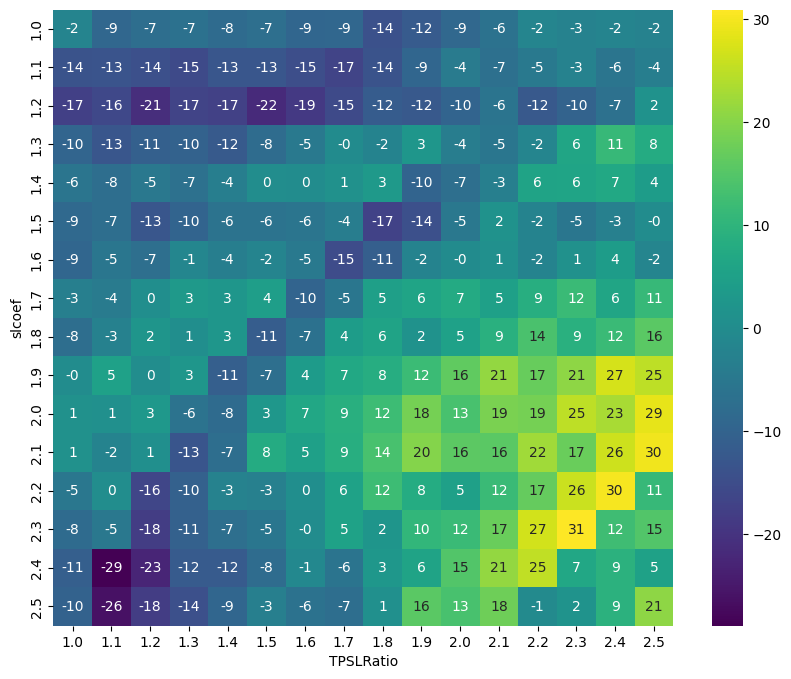

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from backtesting import Strategy
from backtesting import Backtest

def set_atr(data):
    data['ATR'] = ta.atr(data.High, data.Low, data.Close, length=7)
    return data


class MacdStrategy(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5

    def init(self):
        super().init()
        self.signal1 = self.I(lambda: self.data.Total_trade_signal)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        if self.signal1 == 1 and len(self.trades) == 0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr * TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1 == -1 and len(self.trades) == 0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

def backtest_trading(data, cash):
    backtest = Backtest(data, MacdStrategy, cash=cash,
                        margin=1/30, commission=0.00)
    stats, heatmap = backtest.optimize(slcoef=[i/10 for i in range(10, 26)],
                                       TPSLRatio=[i/10 for i in range(10, 26)],
                                       maximize='Return [%]', max_tries=300,
                                       random_state=0,
                                       return_heatmap=True)

    return backtest, stats, heatmap

def show_heatmap(heatmap):
    # Convert multiindex series to dataframe
    heatmap_dataFrame = heatmap.unstack()
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_dataFrame, annot=True, cmap='viridis', fmt='.0f')
    plt.show()


set_atr(trading_data)
backtest, stats, heatmap = backtest_trading(trading_data, 25000)

# last_month_data = tradingData.tail(120)
# backtest, stats, heatmap = backtest_trading(last_month_data, 25000)

print(stats)
backtest.plot()
show_heatmap(heatmap)



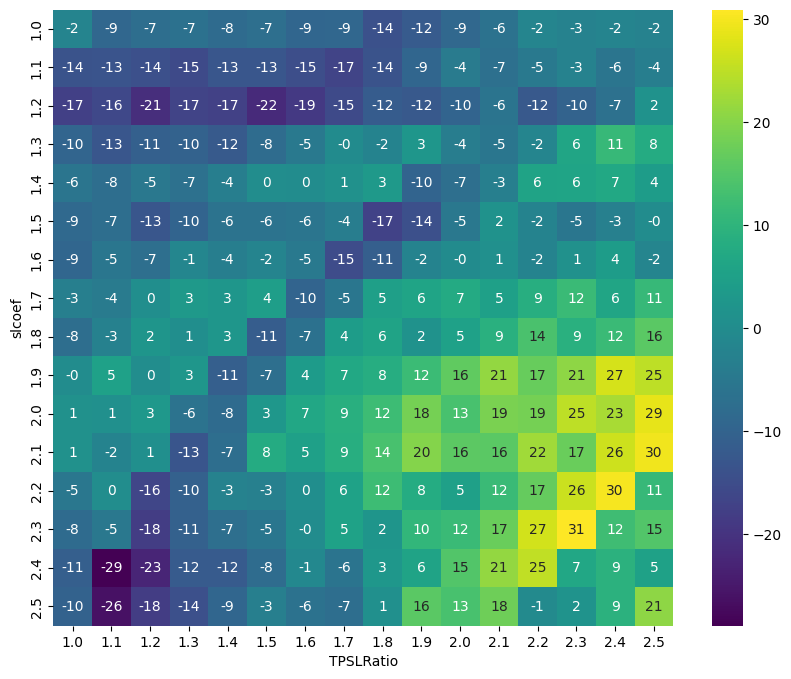

In [42]:
def show_heatmap(heatmap):
    # Convert multiindex series to dataframe
    heatmap_dataFrame = heatmap.unstack()
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_dataFrame, annot=True, cmap='viridis', fmt='.0f')
    plt.show()

show_heatmap(heatmap)


**Trade Log**

- It's helpful to understand where we make profit and loss

In [17]:
trade_log = stats["_trades"]
trade_log

Size  EntryBar  ExitBar    EntryPrice     ExitPrice          PnL  \
0      3        52      109  12170.628906  12506.259240  1006.891001   
1     -3       125      131  12642.103516  12747.343115  -315.718797   
2      3       150      161  12703.646484  13109.502930  1217.569336   
3     -3       170      177  12901.988281  13046.655523  -434.001727   
4      3       181      217  13105.404297  13379.284037   821.639222   
..   ...       ...      ...           ...           ...          ...   
57     3      1660     1672  16294.114258  16102.668945  -574.335938   
58    -3      1674     1682  16156.117188  16354.330507  -594.639958   
59    -3      1691     1709  16170.578125  15768.455026  1206.369297   
60     3      1718     1721  15645.257812  15445.464190  -599.380867   
61     3      1733     1755  15522.673828  15640.110352   352.309570   

    ReturnPct  EntryTime  ExitTime  Duration  
0    0.027577         52       109        57  
1   -0.008325        125       131         6  
2    0.031948        150       161        11  
3   -0.011213        170       177         7  
4    0.020898        181       217        36  
..        ...        ...       ...       ...  
57  -0.011749       1660      1672        12  
58  -0.012269       1674      1682         8  
59   0.024868       1691      1709        18  
60  -0.012770       1718      1721         3  
61   0.007565       1733      1755        22  

[62 rows x 10 columns]

In [21]:
print(f"Short: {trade_log['Size'].value_counts().get(-3)}")
print(f"Long: {trade_log['Size'].value_counts().get(3)}")
trade_log[trade_log['PnL'] < 0]

Short: 30
Long: 32


Size  EntryBar  ExitBar    EntryPrice     ExitPrice          PnL  \
1     -3       125      131  12642.103516  12747.343115  -315.718797   
3     -3       170      177  12901.988281  13046.655523  -434.001727   
6     -3       244      250  13589.793945  13777.337619  -562.631020   
9     -3       330      360  13779.315430  13918.894531  -418.737305   
10    -3       381      385  14155.006836  14223.356433  -205.048791   
11     3       394      402  14380.698242  14265.297852  -346.201172   
12     3       425      466  14131.869141  14006.545872  -375.969807   
13     3       481      486  14065.802734  13897.628488  -504.522739   
16    -3       581      591  13553.842773  13713.290180  -478.342220   
19     3       650      689  13803.750000  13663.455078  -420.884766   
20     3       704      708  13674.985352  13566.021212  -326.892419   
22    -3       736      747  13069.354492  13210.761440  -424.220844   
23    -3       768      788  13076.560547  13284.025658  -622.395333   
24    -3       812      815  13570.571289  13698.635756  -384.193400   
25     3       835      836  13595.810547  13419.575195  -528.706055   
27     3       869      880  13087.428711  12917.034464  -511.182740   
28    -3       882      918  12848.205078  13023.284691  -525.238838   
29    -3       939      941  13468.127930  13572.544550  -313.249861   
31    -3       990     1005  14062.979492  14231.611445  -505.895857   
32     3      1008     1011  14277.504883  14171.989752  -316.545393   
33    -3      1013     1018  14169.712891  14287.642578  -353.789062   
34     3      1023     1049  14292.304688  14191.737204  -301.702451   
35     3      1060     1063  14276.063477  14135.999279  -420.192593   
36    -3      1065     1070  14100.607422  14258.138205  -472.592351   
38    -3      1132     1137  14808.207031  14930.886793  -368.039284   
39    -3      1144     1148  14965.706055  15059.221043  -280.544966   
40     3      1164     1196  15005.351562  14876.220877  -387.392055   
42    -3      1248     1252  14826.276367  15000.372070  -522.287109   
44    -3      1297     1301  15353.579102  15558.005859  -613.280273   
45     3      1303     1312  15569.273438  15434.915531  -403.073720   
46     3      1329     1331  15607.348633  15529.540384  -233.424748   
51     3      1414     1427  15825.860352  15651.309706  -523.651937   
52    -3      1428     1441  15550.663086  15904.575195 -1061.736328   
55     3      1640     1649  16319.100586  16182.020486  -411.240301   
56    -3      1651     1652  16095.825195  16245.792152  -449.900869   
57     3      1660     1672  16294.114258  16102.668945  -574.335938   
58    -3      1674     1682  16156.117188  16354.330507  -594.639958   
60     3      1718     1721  15645.257812  15445.464190  -599.380867   

    ReturnPct  EntryTime  ExitTime  Duration  
1   -0.008325        125       131         6  
3   -0.011213        170       177         7  
6   -0.013800        244       250         6  
9   -0.010130        330       360        30  
10  -0.004829        381       385         4  
11  -0.008025        394       402         8  
12  -0.008868        425       466        41  
13  -0.011956        481       486         5  
16  -0.011764        581       591        10  
19  -0.010164        650       689        39  
20  -0.007968        704       708         4  
22  -0.010820        736       747        11  
23  -0.015865        768       788        20  
24  -0.009437        812       815         3  
25  -0.012962        835       836         1  
27  -0.013020        869       880        11  
28  -0.013627        882       918        36  
29  -0.007753        939       941         2  
31  -0.011991        990      1005        15  
32  -0.007390       1008      1011         3  
33  -0.008323       1013      1018         5  
34  -0.007036       1023      1049        26  
35  -0.009811       1060      1063         3  
36  -0.011172       1065      1070         5  
38  -0.008285       

In [8]:
def set_ema(data, ema_length):
    data['EMA'] = ta.ema(data.Close, length=ema_length)
    return data

set_ema(trading_data, 200)

trading_data

Datetime          Open          High           Low  \
0    2023-04-25 18:30:00+00:00  11842.570312  11854.994141  11827.439453   
1    2023-04-25 19:30:00+00:00  11830.272461  11841.526367  11798.982422   
2    2023-04-26 13:30:00+00:00  11915.990234  11927.615234  11867.620117   
3    2023-04-26 14:30:00+00:00  11884.488281  11953.151367  11883.955078   
4    2023-04-26 15:30:00+00:00  11936.464844  11967.990234  11931.881836   
...                        ...           ...           ...           ...   
1752 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   
1753 2024-04-25 15:30:00+00:00  15466.553711  15521.806641  15432.965820   
1754 2024-04-25 16:30:00+00:00  15518.511719  15562.813477  15502.249023   
1755 2024-04-25 17:30:00+00:00  15541.415039  15624.531250  15539.962891   
1756 2024-04-25 18:30:00+00:00  15566.072266  15619.156250  15551.961914   

             Close       MACD  MACD_signal  MACD_histogram  MACD_trade_signal  \
0     11830.783203        NaN          NaN             NaN                  0   
1     11800.601562        NaN          NaN             NaN                  0   
2     11883.130859        NaN          NaN             NaN                  0   
3     11934.798828        NaN          NaN             NaN                  0   
4     11950.427734        NaN          NaN             NaN                  0   
...            ...        ...          ...             ...                ...   
1752  15466.282227   0.770509    14.635217      -13.864708                 -1   
1753  15518.300781  -7.709438    10.166286      -17.875724                  0   
1754  15542.409180 -12.342237     5.664581      -18.006818                  0   
1755  15567.089844 -13.862443     1.759176      -15.621619                  0   
1756  15615.576172 -11.027655    -0.798190      -10.229465                  0   

      Total_trade_signal         ATR           EMA  
0                      0         NaN           NaN  
1                      0         NaN           NaN  
2                      0         NaN           NaN  
3                      0         NaN           NaN  
4                      0         NaN           NaN  
...                  ...         ...           ...  
1752                  -1  106.129660  15953.470112  
1753                   0  103.659826  15949.140069  
1754                   0   97.503344  15945.092996  
1755                   0   95.655489  15941.331770  
1756                   0   91.589610  15938.090421  

[1757 rows x 12 columns]

In [10]:
import numpy as np

trade_log_analysis = trade_log.merge(trading_data[['Close', 'EMA']], left_on='EntryBar', right_index=True)
trade_log_analysis['EMA'] = trade_log_analysis['EMA'].fillna(0)
trade_log_analysis['Trend'] = np.where(trade_log_analysis['Close'] > trade_log_analysis['EMA'], 'Up',
                                       np.where(trade_log_analysis['Close'] < trade_log_analysis['EMA'], 'Down', 'Neutral'))
trade_log_analysis = trade_log_analysis.reindex(columns=['Size', 'EntryBar', 'Close', 'EMA', 'Trend', 'ExitBar', 'EntryPrice', 'ExitPrice', 'PnL', 'ReturnPct', 'EntryTime', 'ExitTime', 'Duration'])
trade_log_analysis[trade_log_analysis.PnL < 0]

Size  EntryBar         Close           EMA Trend  ExitBar    EntryPrice  \
1     -3       127  12657.945312      0.000000    Up      133  12642.103516   
3     -3       172  12903.689453      0.000000    Up      179  12901.988281   
6     -3       246  13626.515625  12816.925234    Up      252  13589.793945   
9     -3       332  13817.104492  13286.576292    Up      362  13779.315430   
10    -3       383  14176.872070  13522.292507    Up      387  14155.006836   
11     3       396  14354.893555  13613.715491    Up      404  14380.698242   
12     3       427  14147.139648  13755.145681    Up      468  14131.869141   
13     3       483  14102.983398  13924.242397    Up      488  14065.802734   
16    -3       583  13558.715820  13725.681541  Down      593  13553.842773   
19     3       652  13786.064453  13796.467773  Down      691  13803.750000   
20     3       706  13638.668945  13786.865948  Down      710  13674.985352   
22    -3       738  13042.297852  13646.999930  Down      749  13069.354492   
23    -3       770  13107.179688  13521.630790  Down      790  13076.560547   
24    -3       814  13601.779297  13468.778799    Up      817  13570.571289   
25     3       837  13561.541016  13484.328995    Up      838  13595.810547   
27     3       871  13046.787109  13414.992761  Down      882  13087.428711   
28    -3       884  12833.696289  13366.701768  Down      920  12848.205078   
29    -3       941  13498.707031  13225.123984    Up      943  13468.127930   
31    -3       992  14105.773438  13464.997278    Up     1007  14062.979492   
32     3      1010  14273.902344  13576.937758    Up     1013  14277.504883   
33    -3      1015  14189.110352  13608.260570    Up     1020  14169.712891   
34     3      1025  14271.026367  13669.304573    Up     1051  14292.304688   
35     3      1062  14284.152344  13846.701666    Up     1065  14276.063477   
36    -3      1067  14161.048828  13863.318642    Up     1072  14100.607422   
38    -3      1134  14797.648438  14168.171726    Up     1139  14808.207031   
39    -3      1146  14982.102539  14254.518792    Up     1150  14965.706055   
40     3      1166  15027.936523  14382.342497    Up     1198  15005.351562   
42    -3      1250  14914.225586  14637.807293    Up     1254  14826.276367   
44    -3      1299  15379.847656  14814.613438    Up     1303  15353.579102   
45     3      1305  15607.106445  14854.273105    Up     1314  15569.273438   
46     3      1331  15585.787109  15006.063878    Up     1333  15607.348633   
51     3      1416  15820.058594  15400.234960    Up     1429  15825.860352   
52    -3      1430  15608.359375  15454.690985    Up     1443  15550.663086   
55     3      1642  16324.050781  16140.054596    Up     1651  16319.100586   
56    -3      1653  16163.780273  16155.057072    Up     1654  16095.825195   
57     3      1662  16244.208984  16164.162795    Up     1674  16294.114258   
58    -3      1676  16131.128906  16172.826795  Down     1684  16156.117188   
60     3      1720  15619.413086  16105.122838  Down     1723  15645.257812   

       ExitPrice          PnL  ReturnPct  EntryTime  ExitTime  Duration  
1   12747.343115  -315.718797  -0.008325        127       133         6  
3   13046.655523  -434.001727  -0.011213        172       179         7  
6   13777.337619  -562.631020  -0.013800        246       252         6  
9   13918.894531  -418.737305  -0.010130        332       362        30  
10  14223.356433  -205.048791  -0.004829        383       387         4  
11  14265.297852  -346.201172  -0.008025        396       404         8  
12  14006.545872  -375.969807  -0.008868        427       468        41  
13  13897.628488  -504.522739  -0.011956        483       488         5  
16  13713.290180  -478.342220  -0.011764        583       593        10  
19  13663.455078  -420.884766  -0.010164        652       691        39  
20  13566.021212  -326.892419  -0.007968        706       710         4  
22  13210.761440  -424.220844  -0.

In [7]:
import common_functions as cf

indices = ['^ixic', '^GSPC', '^DJI', '^NYA', '^BUK100P',
           '^RUT', '^VIX', '^FTSE', '^N225', '^HSI', '^GDAXI', '^FCHI']
return_stats = pd.DataFrame(
    columns=['Index', 'Buy & Hold Return [%]', 'Return [%]'])

def total_trade_signal(row):
    if (row.MACD_trade_signal == 1):
        return 1
    elif (row.MACD_trade_signal == -1):
        return -1
    else:
        return 0

for index in indices:
    trading_data = read_data(index, '1y', '1h')
    cf.set_indicators(trading_data, 200)
    cf.set_trade_signals(trading_data, total_trade_signal)
    stats, heatmap = backtest_trading(trading_data, 25000)

    return_stats = pd.concat([
        return_stats,
        pd.DataFrame([[index, stats.loc['Buy & Hold Return [%]'], stats.loc['Return [%]']]], columns=[
                     'Index', 'Buy & Hold Return [%]', 'Return [%]'])
    ], ignore_index=True)


return_stats

100%|██████████| 1756/1756 [00:00<00:00, 161591.91it/s]
/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,


number of trades: 127


/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/811386370.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return_stats = pd.concat([
100%|██████████| 1749/1749 [00:00<00:00, 80187.99it/s]
/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


number of trades: 117


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 1749/1749 [00:00<00:00, 164318.56it/s]

number of trades: 107



/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  backtest = Backtest(data, MacdStrategy, cash=cash,
/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 1749/1749 [00:00<00:00, 142357.76it/s]

number of trades: 110



/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 2261/2261 [00:00<00:00, 139524.21it/s]

number of trades: 152



/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 1749/1749 [00:00<00:00, 163823.17it/s]

number of trades: 119



/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 3551/3551 [00:00<00:00, 151453.87it/s]
/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,


number of trades: 262


/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 2258/2258 [00:00<00:00, 145905.69it/s]

number of trades: 153



/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 1470/1470 [00:00<00:00, 135872.60it/s]
/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  backtest = Backtest(data, MacdStrategy, cash=cash,
/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,


number of trades: 96


/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 1706/1706 [00:00<00:00, 146830.33it/s]

number of trades: 112



/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 2291/2291 [00:00<00:00, 96479.35it/s]
/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,


number of trades: 155


/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 2295/2295 [00:00<00:00, 165141.41it/s]

number of trades: 160



/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_34806/2266502320.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Index  Buy & Hold Return [%]  Return [%]
0      ^ixic              31.377496   30.911933
1      ^GSPC              20.992456   11.532475
2       ^DJI              12.867031   56.513032
3       ^NYA              12.727577   26.639457
4   ^BUK100P               1.394891    0.231659
5       ^RUT               9.503821    3.908430
6       ^VIX              -6.253454    0.139061
7      ^FTSE               1.547797    1.520610
8      ^N225              30.877396   58.506870
9       ^HSI             -17.553435  119.540447
10    ^GDAXI              12.515501   40.308807
11     ^FCHI               6.377608    8.830401